In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [12]:
lichess_img_path = "/Users/sashanktirumala/Desktop/chess_vm.png"
lichess_img = Image.open(lichess_img_path)
pts= [(200, 190), (720, 190), (720, 710), (200, 710)]
min_x = min([pts[0][0], pts[1][0], pts[2][0], pts[3][0]])
max_x = max([pts[0][0], pts[1][0], pts[2][0], pts[3][0]])
min_y = min([pts[0][1], pts[1][1], pts[2][1], pts[3][1]])
max_y = max([pts[0][1], pts[1][1], pts[2][1], pts[3][1]])


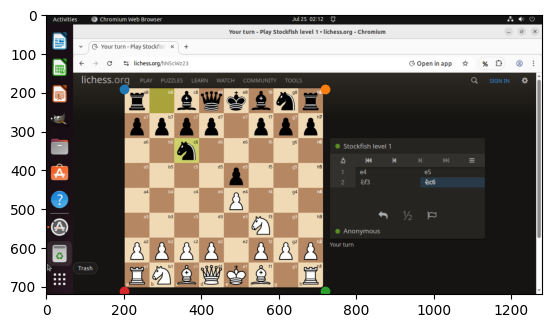

In [13]:
plt.imshow(lichess_img)
plt.scatter(pts[0][0], pts[0][1])
plt.scatter(pts[1][0], pts[1][1])
plt.scatter(pts[2][0], pts[2][1])
plt.scatter(pts[3][0], pts[3][1])
plt.show()

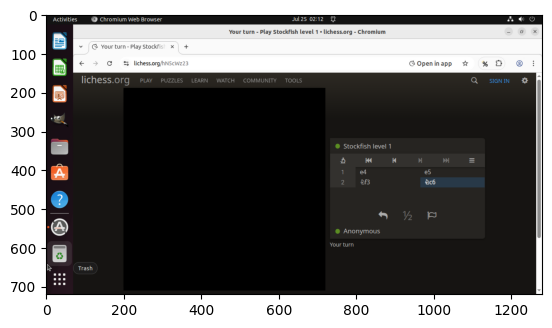

In [15]:
arr = np.array(lichess_img)
arr.shape
height, width, c = arr.shape
for y in range(height):
    for x in range(width):
        if y < min_y:
            continue
        if y > max_y:
            continue
        if x >max_x:
            continue
        if x < min_x:
            continue
        arr[y][x] = [0.0,0.0,0.0]

plt.imshow(arr)
